## Libraries import
Run the following cell at startup by pressing: shift + enter

In [20]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from Routines import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Formula analysis
Based on:
$$ T(\lambda) = R(\lambda) \cdot 10^{-A} + N_B (\lambda) $$

Thus:
$$ S_+ : T(\lambda, B+) = R(\lambda) \cdot 10^{-(A+\delta A)} + N_B (\lambda) $$
$$ S_- : T(\lambda, B-) = R(\lambda) \cdot 10^{-(A-\delta A)} + N_B (\lambda) $$

Where $T$ is the Transmittance, $B$ the magnetic field, $\lambda$ the wavelength and $N_B$ the background noise. 

To obtain the $A$ and $\delta A$ in function of the measured parameters:

$$ \log_{10} (S_+ -N_B (\lambda)) = \log_{10} R(\lambda) -A -\delta A $$
$$ \log_{10} (S_- -N_B (\lambda)) = \log_{10} R(\lambda) -A +\delta A +  $$

CHECK HERE
The sum $ \Rightarrow: $
$$ \log_{10} (S_+ - N_B (\lambda)) + \log_{10} (S_- -N_B (\lambda)) = 2\log_{10} R(\lambda) -2A $$
$$ \Rightarrow: -\frac{1}{2} \cdot \left ( \log_{10} (S_+ -N_B (\lambda)) + \log_{10} (S_- -N_B (\lambda)) - 2\log_{10} R(\lambda) \right )= A $$

Where $R(\lambda)$ is the real incident specturm to te sample. This can be computed by measuring $T$ at the spectrometer level without sample (B+ or B- should have no effect) and substracting $N_B$, the background noise. So, $R(\lambda) = T (\lambda, B+ \, or \; B-) - N_B (\lambda) $.

The diff $ \Rightarrow: $
$$ \log_{10} (S_+ -N_B (\lambda)) - \log_{10} (S_- -N_B (\lambda)) = -2 \delta A $$
$$ \Rightarrow: -\frac{1}{2} \cdot \log_{10} (S_+ -N_B (\lambda)) - \log_{10} (S_- -N_B (\lambda)) = \delta A $$


## Inputs definition
Define the different input files contianing the spectrums respective to Dark, Signal and Reference (signal without sample) and confirm its storage path.
The Filename does not need the full filename: prefix and extension can be omitted.

In [46]:
dark_filename = '2024-06-13_15-30-27'
reference_filename = 'MChD_2024-06-13_15-33-18' # No sample measurement

path = os.path.expanduser('~').replace('\\', '/') + r'/Documents/MChD_Data/'
print(f'Detected storage path: {path}')

Detected storage path: C:/Users/lorenco/Documents/MChD_Data/


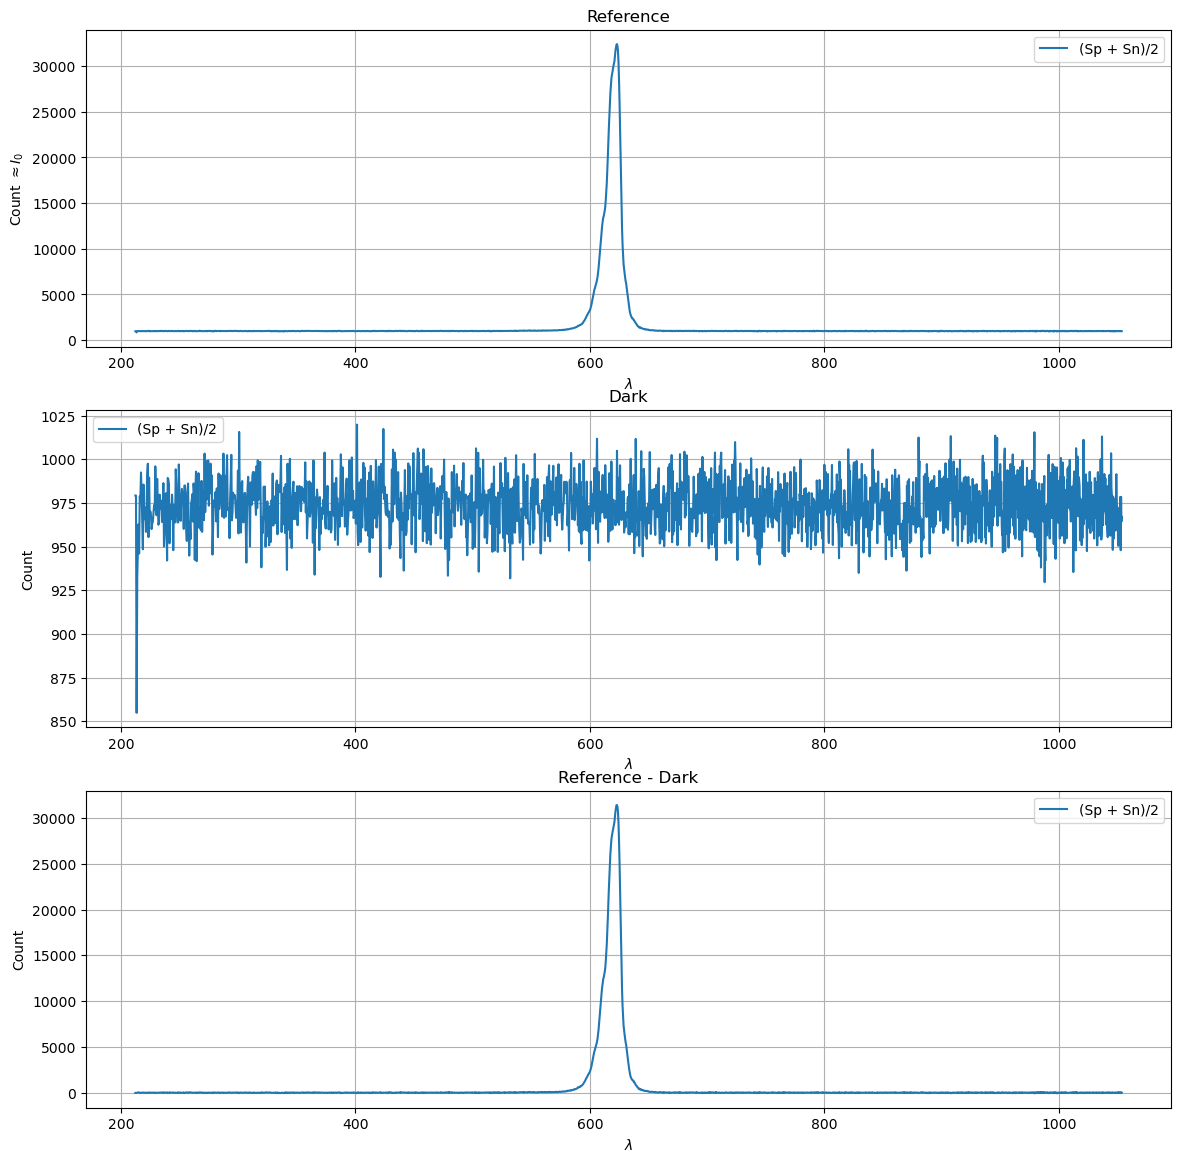

In [47]:
dark, reference = plot_reference_dark(path, dark_filename, reference_filename)

## Data Processing
Read the reference and dark files. Display them and then compute the Absorbance ($A$) and the modification of absorbance due to the magnetic field polarity ($\delta A$).

According to:

$ A = -\frac{1}{2} \cdot \left ( \log_{10} (S_+ -N_B (\lambda)) + \log_{10} (S_- -N_B (\lambda)) - 2\log_{10} R(\lambda) \right ) $ and $ \delta A = -\frac{1}{2} \cdot (\log_{10} (S_+ -N_B (\lambda)) - \log_{10} (S_- -N_B (\lambda)))$

C:\Users\lorenco\AppData\Local\anaconda3\envs\MChD\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lorenco\AppData\Local\anaconda3\envs\MChD\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


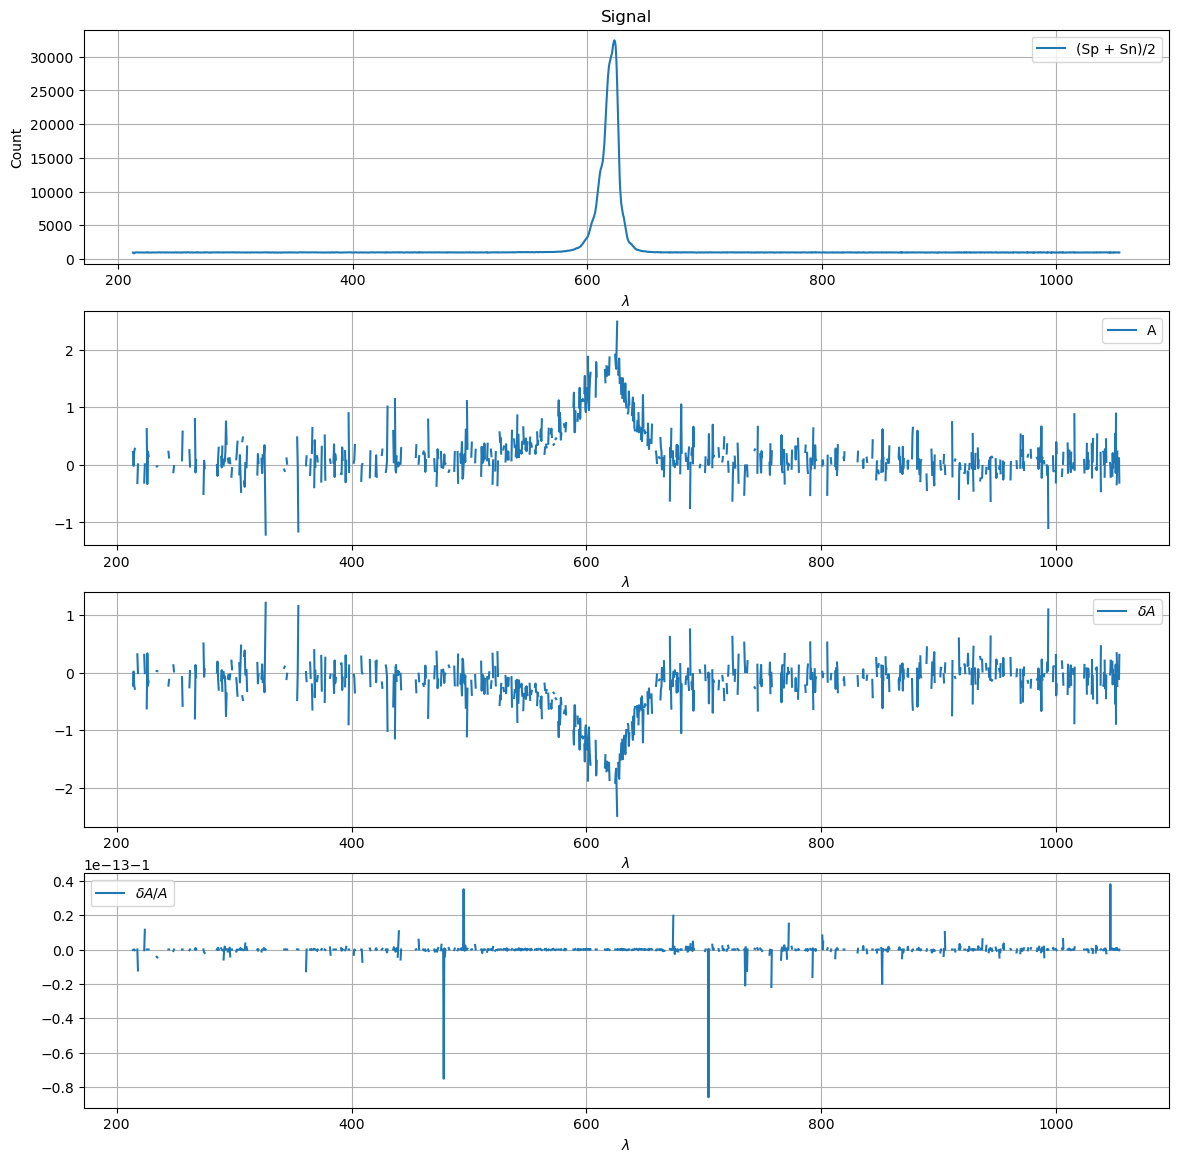

In [49]:
signal_filename = 'MChD_2024-06-13_15-33-18'
compute_absorbance(path, dark, reference, signal_filename)

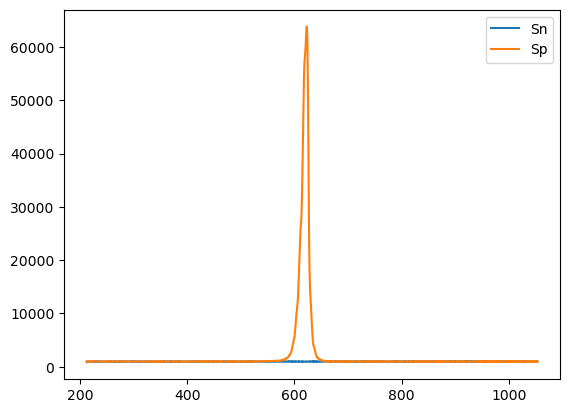

In [50]:
plt.plot(dark['Wavelength'], reference['Sn mean'], label='Sn')
plt.plot(dark['Wavelength'], reference['Sp mean'], label='Sp')
plt.legend()
plt.show()

In [70]:
import numpy as np
a = np.unwrap([70, 80, -80, 81, 80+360, 170], period=180)
print(a)

[ 70  80 100  81  80 -10]
